<a href="https://colab.research.google.com/github/surajsrivathsa/ovgu_deeplearning/blob/master/Assignment_3_Keras_%26_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning programming task

**Assignment 3:** Keras and CNN

**Team members:**
1. Sanjeeth Busnur Indushekar: 224133 : sanjeeth.busnur@st.ovgu.de
2. Aditya Dey : 230580 : aditya.dey@st.ovgu.de
3. Suraj Shashidhar: 230052 : suraj.shashidhar@st.ovgu.de

1. Basic CNN on Mnsit and Zalando dataset
2. CNN on CIFAR-10

In [0]:
import os
%tensorflow_version 2.x
import tensorflow as tf
from sklearn import preprocessing
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import copy
import numpy as np

In [0]:
from tensorflow import keras

from tensorflow.keras import datasets, layers, models

In [0]:
files.upload()

Saving datasets.py to datasets.py


{'datasets.py': b'import numpy as np\n\n\nclass MNISTDataset:\n    """\'Bare minimum\' class to wrap MNIST numpy arrays into a dataset."""\n    def __init__(self, train_imgs, train_lbs, test_imgs, test_lbls, batch_size,\n                 to01=True, shuffle=True, seed=None):\n        """\n        Use seed optionally to always get the same shuffling (-> reproducible\n        results).\n        """\n        self.batch_size = batch_size\n        self.train_data = train_imgs\n        self.train_labels = train_lbs.astype(np.int32)\n        self.test_data = test_imgs\n        self.test_labels = test_lbls.astype(np.int32)\n\n        if to01:\n            # int in [0, 255] -> float in [0, 1]\n            self.train_data = self.train_data.astype(np.float32) / 255\n            self.test_data = self.test_data.astype(np.float32) / 255\n\n        self.size = self.train_data.shape[0]\n\n        if seed:\n            np.random.seed(seed)\n        if shuffle:\n            self.shuffle_train()\n        

In [3]:
  print(os.getcwd())
  print(tf.__version__)

/content
2.2.0-rc4


In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:

path = '.'
 
files = os.listdir(path)
for name in files:
    print(name)

.config
sample_data


# **Basic CNN on MNSIT**

In [5]:
mnist = tf.keras.datasets.mnist
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
5


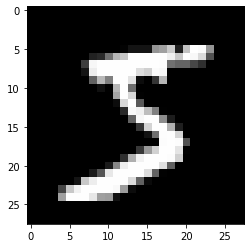

In [6]:
print(train_images_raw.shape)
print(train_labels_raw.shape)
print(test_images_raw.shape)
print(test_labels_raw.shape)
print(train_labels_raw[0])
plt.imshow(train_images_raw[0], cmap="Greys_r")

In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images_raw.astype(np.float32)/255.0, train_labels_raw.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images_raw.shape[0]).batch(32)

test_data = tf.data.Dataset.from_tensor_slices(( test_images_raw.astype(np.float32)/255.0, test_labels_raw.astype(np.int32) ))

test_data = test_data.batch(32)

In [0]:
inputs = keras.Input(shape = (train_images_raw.shape[1], train_images_raw.shape[2], 1, ), name = "digits")
hidden = layers.Conv2D(filters = 16, kernel_size=(3, 3), padding = "valid", activation=tf.nn.relu, name = "conv_1")(inputs)
hidden = layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_1")(hidden)
hidden = layers.Conv2D(filters = 32, kernel_size=(3, 3), padding = "valid", activation = tf.nn.relu, name = "conv_2")(hidden)
hidden = layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_2")(hidden)

In [8]:
input_shape = (train_images_raw.shape[1], train_images_raw.shape[2], 1)
print(input_shape)

(28, 28, 1)


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size=(3, 3), padding = "valid", activation=tf.nn.relu,name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "valid", activation = tf.nn.relu, name = "conv_2"))
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_2"))
model.add(layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "valid", activation = tf.nn.relu, name = "conv_3"))
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_3"))
model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(64, activation=tf.nn.relu))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 12, 12, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 10, 10, 128)       73856     
_________________________________________________________________
maxpool_3 (MaxPooling2D)     (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [0]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=  5 * 1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [11]:
epochs=5
for epoch in range(epochs):
  print("===== epoch number: {}".format(epoch))

  for step, (x_batch_train, y_batch_train) in enumerate(train_data):

    with tf.GradientTape() as tape:
      logits = model(x_batch_train, training=True)
      
      loss_value = loss_fn(y_batch_train, logits)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    # Update training metric.
    train_acc_metric(y_batch_train, logits)

    # Log every 200 batches.
    if step % 500 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

  # Display metrics at the end of each epoch.
  train_acc = train_acc_metric.result()
  print('Training acc over epoch: %s' % (float(train_acc),))
  # Reset training metrics at the end of each epoch
  train_acc_metric.reset_states()

  for x_batch_val, y_batch_val in test_data:
    val_logits = model(x_batch_val)
    # Update val metrics
    val_acc_metric(y_batch_val, val_logits)
  val_acc = val_acc_metric.result()
  val_acc_metric.reset_states()
  print('Validation acc: %s' % (float(val_acc),))

  

===== epoch number: 0
Training loss (for one batch) at step 0: 2.318284034729004
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.030970033258199692
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.0019125521648675203
Seen so far: 64064 samples
Training loss (for one batch) at step 1500: 0.07307741045951843
Seen so far: 96064 samples
Training acc over epoch: 0.966533362865448
Validation acc: 0.9860000014305115
===== epoch number: 1
Training loss (for one batch) at step 0: 0.01849358156323433
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.013811783865094185
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.04943034052848816
Seen so far: 64064 samples
Training loss (for one batch) at step 1500: 0.08868229389190674
Seen so far: 96064 samples
Training acc over epoch: 0.9835166931152344
Validation acc: 0.9861000180244446
===== epoch number: 2
Training loss (for one batch) at step 0: 0.11301058530807495


# **Basic CNN on Zalando**